In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the boston_housing dataset

In [115]:
df = pd.read_csv("data/boston_housing_preprocessed.csv")

# Explore the data by
* Showing the first few rows
* Print the number of rows and columns of this dataset
* Giving a summary of the dataset

In [116]:
display(df.head())
print('rows,columns')
display(df.shape)
display(df.describe())

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,504.000000
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,453.600008
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,728.700016
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,701.400032
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,760.200016


rows,columns


(506, 15)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.623075,11.363636,11.136779,0.0,0.782968,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,473.188934
std,146.213884,8.600805,23.322453,6.860353,0.0,1.225300,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,193.139186
min,0.000000,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,105.000000
25%,126.250000,0.082045,0.000000,5.190000,0.0,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,357.525002
50%,252.500000,0.256510,0.000000,9.690000,0.0,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,445.200016
75%,378.750000,3.689388,12.500000,18.100000,0.0,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,525.000000
max,505.000000,88.976196,100.000000,27.740000,0.0,7.130000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,1050.000000


In [117]:
df.loc[df.NOX>100,"NOX"]=df.NOX/100

In [118]:
df.to_csv("data/boston_housing.csv")

## Preprocessing
* Check for any NA values in the data, if necessary remove them
* Remove any non informative columns
* Make a histogram of the price column
* Convert all prices <800 to 0, all prices >=800 to 1 (we are making 2 groups)
* Make from these converted prices a barplot. Is this balanced data or not?

In [119]:
print("Do we have NA values?")
print(np.any(df.isna()))

print("In case we would have NA values, show these rows")
# Display the na values
display(df[np.any(df.isna(), axis=1)])
print("Empty rows if no NA values")

print("="*79)

print("If we would have NA values, drop the rows containing them")
df.dropna(inplace=True)

Do we have NA values?
False
In case we would have NA values, show these rows


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price


Empty rows if no NA values
If we would have NA values, drop the rows containing them


In [120]:
df.drop("CHAS",axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

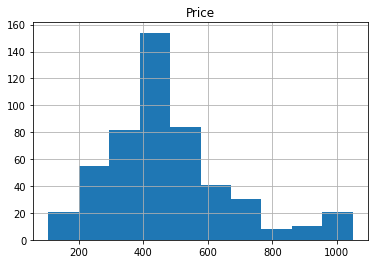

In [121]:
# Histogram
df.hist("Price")

In [122]:
df.loc[df.Price<600,"Price"]=0
df.loc[df.Price>=600,"Price"]=1

<AxesSubplot:xlabel='Price', ylabel='count'>

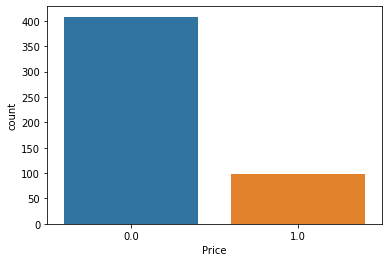

In [123]:
sns.countplot(data=df,x="Price")

It is clear that this is unbalanced data because we have a lot less samples in class 1

# Clustering
* Use KMeans clustering to cluster the above data
    * Make sure you don't take price into consideration for the clustering
    * Determine the optimal number of clusters for this dataset, discuss why you would suggest this

In [124]:
from sklearn.cluster import KMeans
features = df.drop("Price",axis=1)

Text(0, 0.5, 'WCSS')

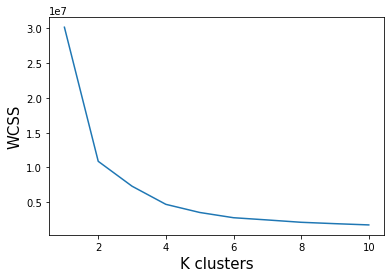

In [125]:
# Calculate the wcss for models ranging between 1 and 10 clusters:
wcss_list = []

for K in range(1, 11):
    model = KMeans(n_clusters=K)
    model.fit(features)
    wcss_list.append(model.inertia_)

plt.plot(range(1, 11), wcss_list)
plt.xlabel('K clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15)

For this example, I would pick 2 clusters, even though you could argue 4 would also be an option. We can see this based on the knick in the plot of the WCSS

## Question
Is this in any way related to the steps we did before? (Changing the price column into 2 classes)

-> No, we did not fit our data on the price/classes. It is pure coincidence that apparently there are 2 big groups of houses in our dataset.

# Dimensionality reduction
* Perform a principal component analysis on the dataset. Compute two PCs.
* Plot the principal components you get, color the points based on the Price classes we made earlier.

In [126]:
from sklearn.decomposition import PCA
PCA_model = PCA(n_components=2)
features_PCA = PCA_model.fit_transform(features)

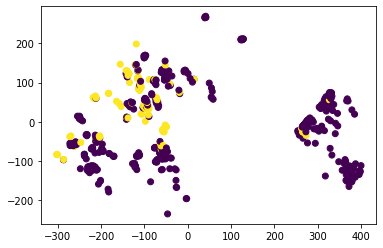

In [127]:
plt.scatter(features_PCA[:,0],features_PCA[:,1],c=df.Price)

## Question
Can you see the number of cluster you selected earlier in this plot?

Based on this plot, can you argue that the clusters represent the price classes?

## Classification model on PCA
* Create a classifier (you can choose which one) and train it on the PCA data
    * Check the performance, for this, create a train and test split

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_PCA, df.Price,test_size = 0.2)

In [129]:
from sklearn.linear_model import LogisticRegression
LM = LogisticRegression(class_weight="balanced")
LM.fit(X_train,y_train)
y_pred = LM.predict(X_test)

In [131]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.51      0.67        86
         1.0       0.26      0.94      0.41        16

    accuracy                           0.58       102
   macro avg       0.62      0.72      0.54       102
weighted avg       0.87      0.58      0.63       102

[[44 42]
 [ 1 15]]
